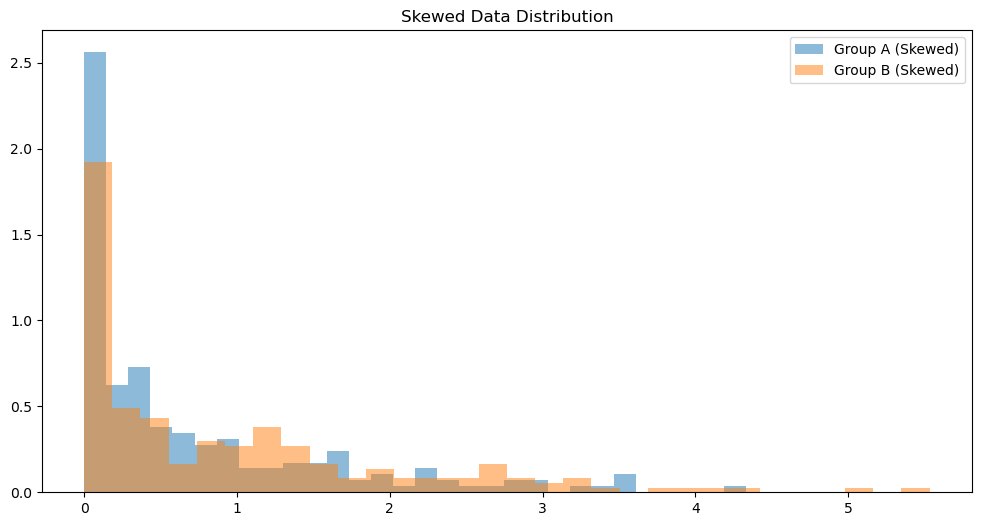

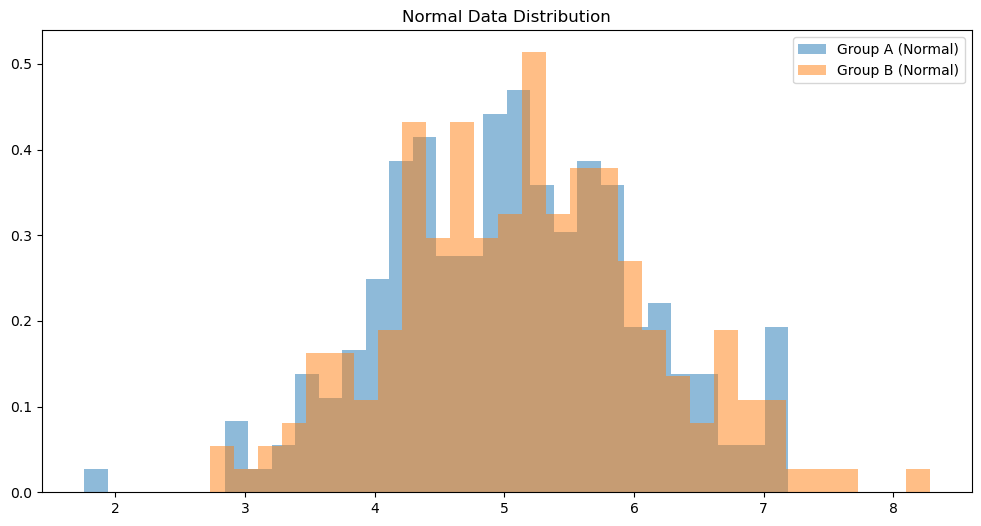

AB Test on Raw Skewed Data:
t-statistic: -2.2888342801128267, p-value: 0.022633924634106628

AB Test on Raw Normal Data:
t-statistic: -0.9716522715025766, p-value: 0.3318141748625786

AB Test on Log-Transformed Skewed Data:
t-statistic: -2.1635148614358144, p-value: 0.03110549593642105

Summary of AB Test Results:
Raw Skewed Data p-value: 0.022633924634106628
Log-Transformed Skewed Data p-value: 0.03110549593642105
Raw Normal Data p-value: 0.3318141748625786


In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Simulate skewed data for Group A and Group B with zeros
group_a_skewed = np.concatenate([np.zeros(50), np.random.exponential(scale=1, size=150)])
group_b_skewed = np.concatenate([np.zeros(50), np.random.exponential(scale=1.2, size=150)])

# Simulate normally distributed data for Group A and Group B (linear assumption case)
group_a_normal = np.random.normal(loc=5, scale=1, size=200)
group_b_normal = np.random.normal(loc=5.2, scale=1, size=200)

# Plot the distributions to visualize skewness and normality
plt.figure(figsize=(12, 6))
plt.hist(group_a_skewed, bins=30, alpha=0.5, label='Group A (Skewed)', density=True)
plt.hist(group_b_skewed, bins=30, alpha=0.5, label='Group B (Skewed)', density=True)
plt.title('Skewed Data Distribution')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.hist(group_a_normal, bins=30, alpha=0.5, label='Group A (Normal)', density=True)
plt.hist(group_b_normal, bins=30, alpha=0.5, label='Group B (Normal)', density=True)
plt.title('Normal Data Distribution')
plt.legend()
plt.show()

# AB Test without log transformation (Raw Data)
print("AB Test on Raw Skewed Data:")
t_stat_skewed, p_value_skewed = stats.ttest_ind(group_a_skewed, group_b_skewed, equal_var=False)
print(f"t-statistic: {t_stat_skewed}, p-value: {p_value_skewed}")

print("\nAB Test on Raw Normal Data:")
t_stat_normal, p_value_normal = stats.ttest_ind(group_a_normal, group_b_normal, equal_var=False)
print(f"t-statistic: {t_stat_normal}, p-value: {p_value_normal}")

# Log transformation to reduce skewness
group_a_skewed_log = np.log(group_a_skewed + 1)
group_b_skewed_log = np.log(group_b_skewed + 1)

# AB Test after log transformation
print("\nAB Test on Log-Transformed Skewed Data:")
t_stat_skewed_log, p_value_skewed_log = stats.ttest_ind(group_a_skewed_log, group_b_skewed_log, equal_var=False)
print(f"t-statistic: {t_stat_skewed_log}, p-value: {p_value_skewed_log}")

# Summarize the results
print("\nSummary of AB Test Results:")
print(f"Raw Skewed Data p-value: {p_value_skewed}")
print(f"Log-Transformed Skewed Data p-value: {p_value_skewed_log}")
print(f"Raw Normal Data p-value: {p_value_normal}")


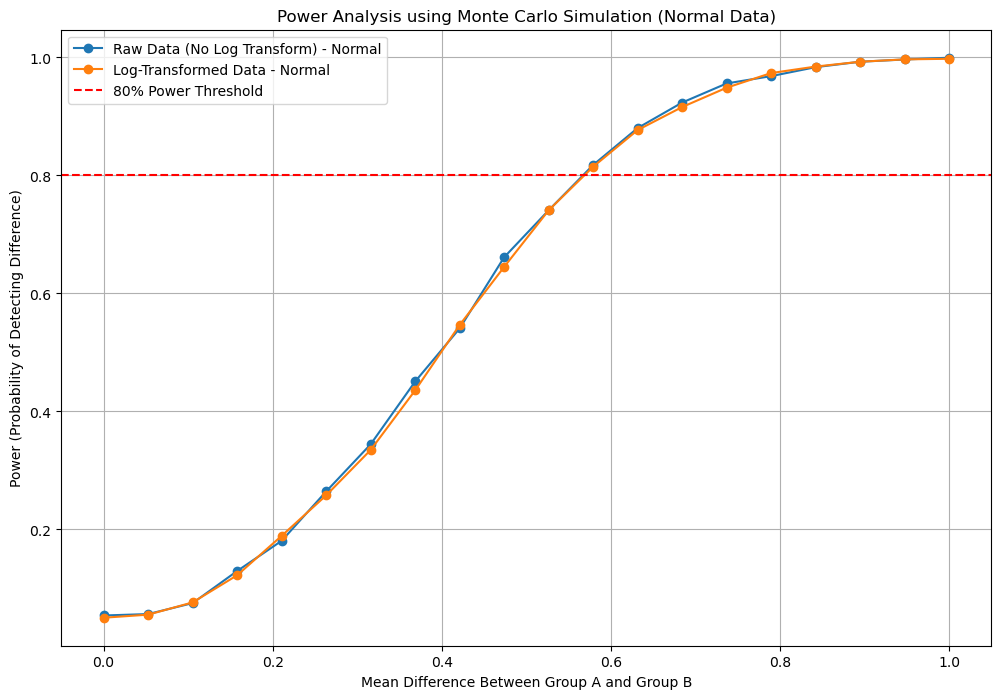

In [3]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Function to generate data based on the selected distribution
def generate_data(distribution, shift, sample_size):
    if distribution == 'normal':
        group_a = np.random.normal(loc=5, scale=1, size=sample_size)
        group_b = np.random.normal(loc=5 + shift, scale=1, size=sample_size)
    elif distribution == 'poisson':
        group_a = np.random.poisson(lam=5, size=sample_size)
        group_b = np.random.poisson(lam=5 + shift, size=sample_size)
    elif distribution == 'exponential':
        group_a = np.random.exponential(scale=1, size=sample_size)
        group_b = np.random.exponential(scale=1 + shift, size=sample_size)
    else:
        raise ValueError("Unsupported distribution type. Choose 'normal', 'poisson', or 'exponential'.")
    
    return group_a, group_b

# Function to perform a Monte Carlo simulation for power analysis with different distributions
def monte_carlo_power_analysis(mean_shift, distribution='exponential', sample_size=50, iterations=5000, alpha=0.05, apply_log=False):
    power_results = []
    
    for shift in mean_shift:
        significant_count = 0
        
        for _ in range(iterations):
            # Generate data for Group A and Group B based on the specified distribution
            group_a, group_b = generate_data(distribution, shift, sample_size)
            
            # Apply log transformation if required
            if apply_log:
                group_a = np.log(group_a + 1)
                group_b = np.log(group_b + 1)
            
            # Perform the t-test
            _, p_value = stats.ttest_ind(group_a, group_b, equal_var=False)
            
            # Check if the p-value is below the significance level
            if p_value < alpha:
                significant_count += 1
        
        # Calculate the power (proportion of tests where we correctly reject the null)
        power = significant_count / iterations
        power_results.append(power)
    
    return power_results

# Define the mean shift range
mean_shifts = np.linspace(0, 1, 20)  # Gradually increase mean difference from 0 to 1

# Choose the distribution type: 'normal', 'poisson', or 'exponential'
distribution_type = 'normal'  # You can change this to 'poisson' or 'exponential'

# Perform the power analysis using Monte Carlo simulation for both raw and log-transformed data
power_results_raw = monte_carlo_power_analysis(mean_shifts, distribution=distribution_type)
power_results_log = monte_carlo_power_analysis(mean_shifts, distribution=distribution_type, apply_log=True)

# Plotting the Power Curves for both cases
plt.figure(figsize=(12, 8))
plt.plot(mean_shifts, power_results_raw, marker='o', label=f'Raw Data (No Log Transform) - {distribution_type.capitalize()}')
plt.plot(mean_shifts, power_results_log, marker='o', label=f'Log-Transformed Data - {distribution_type.capitalize()}')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Power Threshold')
plt.title(f'Power Analysis using Monte Carlo Simulation ({distribution_type.capitalize()} Data)')
plt.xlabel('Mean Difference Between Group A and Group B')
plt.ylabel('Power (Probability of Detecting Difference)')
plt.grid(True)
plt.legend()
plt.show()


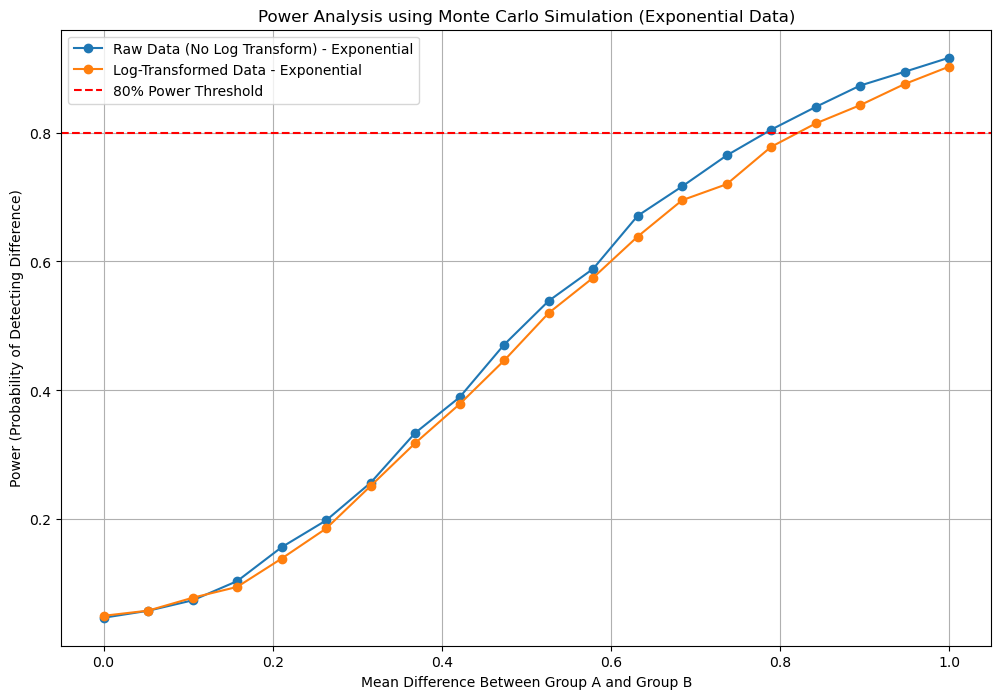

In [4]:
# Define the mean shift range
mean_shifts = np.linspace(0, 1, 20)  # Gradually increase mean difference from 0 to 1

# Choose the distribution type: 'normal', 'poisson', or 'exponential'
distribution_type = 'exponential'  # You can change this to 'poisson' or 'exponential'

# Perform the power analysis using Monte Carlo simulation for both raw and log-transformed data
power_results_raw = monte_carlo_power_analysis(mean_shifts, distribution=distribution_type)
power_results_log = monte_carlo_power_analysis(mean_shifts, distribution=distribution_type, apply_log=True)

# Plotting the Power Curves for both cases
plt.figure(figsize=(12, 8))
plt.plot(mean_shifts, power_results_raw, marker='o', label=f'Raw Data (No Log Transform) - {distribution_type.capitalize()}')
plt.plot(mean_shifts, power_results_log, marker='o', label=f'Log-Transformed Data - {distribution_type.capitalize()}')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Power Threshold')
plt.title(f'Power Analysis using Monte Carlo Simulation ({distribution_type.capitalize()} Data)')
plt.xlabel('Mean Difference Between Group A and Group B')
plt.ylabel('Power (Probability of Detecting Difference)')
plt.grid(True)
plt.legend()
plt.show()


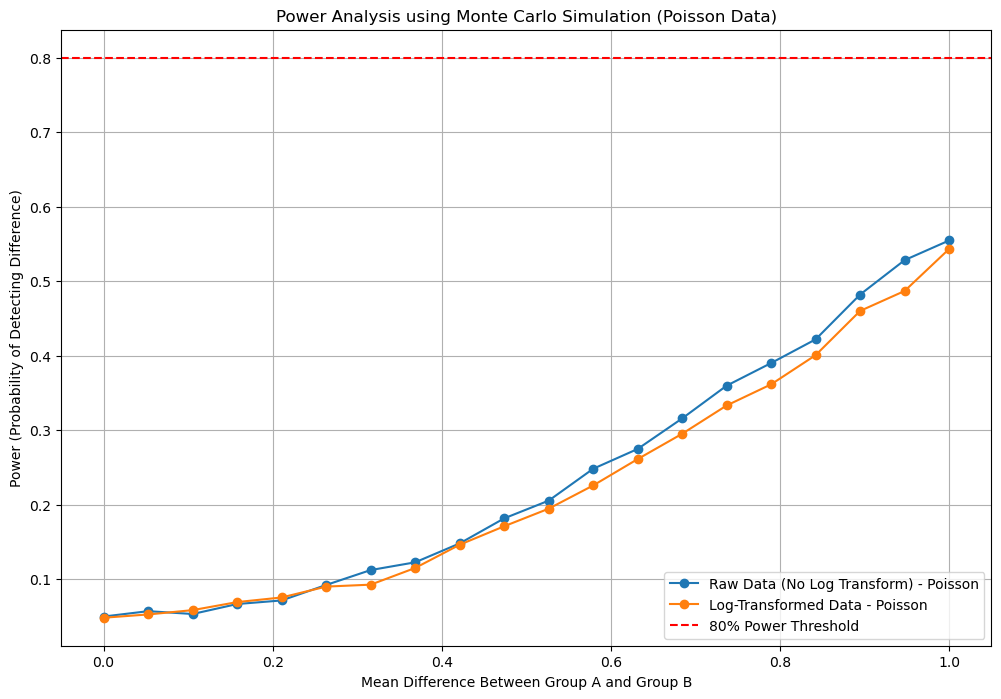

In [5]:
# Define the mean shift range
mean_shifts = np.linspace(0, 1, 20)  # Gradually increase mean difference from 0 to 1

# Choose the distribution type: 'normal', 'poisson', or 'exponential'
distribution_type = 'poisson'  # You can change this to 'poisson' or 'exponential'

# Perform the power analysis using Monte Carlo simulation for both raw and log-transformed data
power_results_raw = monte_carlo_power_analysis(mean_shifts, distribution=distribution_type)
power_results_log = monte_carlo_power_analysis(mean_shifts, distribution=distribution_type, apply_log=True)

# Plotting the Power Curves for both cases
plt.figure(figsize=(12, 8))
plt.plot(mean_shifts, power_results_raw, marker='o', label=f'Raw Data (No Log Transform) - {distribution_type.capitalize()}')
plt.plot(mean_shifts, power_results_log, marker='o', label=f'Log-Transformed Data - {distribution_type.capitalize()}')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Power Threshold')
plt.title(f'Power Analysis using Monte Carlo Simulation ({distribution_type.capitalize()} Data)')
plt.xlabel('Mean Difference Between Group A and Group B')
plt.ylabel('Power (Probability of Detecting Difference)')
plt.grid(True)
plt.legend()
plt.show()


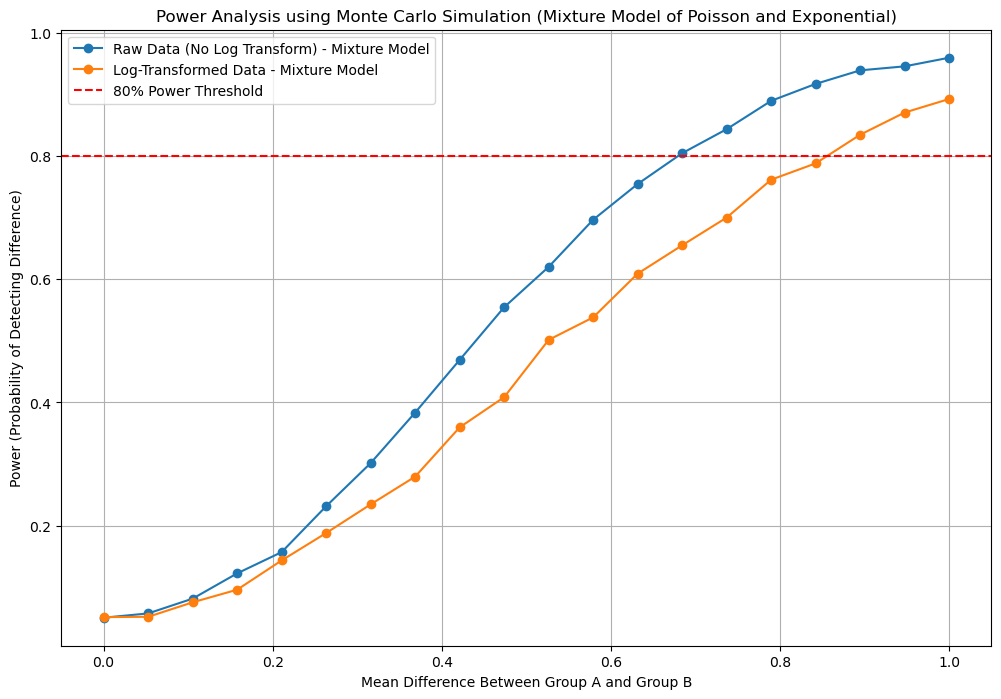

In [8]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Function to generate data based on a mixture of Poisson and Exponential distributions
def generate_mixture_data(shift, sample_size, poisson_weight=0.5, poisson_lambda=1, exponential_scale=1):
    group_a = []
    group_b = []
    
    for _ in range(sample_size):
        # Group A data generation
        if np.random.rand() < poisson_weight:  # Poisson component
            group_a.append(np.random.poisson(lam=poisson_lambda))
        else:  # Exponential component
            group_a.append(np.random.exponential(scale=exponential_scale))
        
        # Group B data generation with a shift in the Exponential component
        if np.random.rand() < poisson_weight:  # Poisson component
            group_b.append(np.random.poisson(lam=poisson_lambda))
        else:  # Exponential component with a shifted scale
            group_b.append(np.random.exponential(scale=exponential_scale + shift))
    
    return np.array(group_a), np.array(group_b)

# Function to perform a Monte Carlo simulation for power analysis with the mixture model
def monte_carlo_power_analysis_mixture(mean_shift, sample_size=200, iterations=2000, alpha=0.05, apply_log=False):
    power_results = []
    
    for shift in mean_shift:
        significant_count = 0
        
        for _ in range(iterations):
            # Generate data for Group A and Group B using the mixture model
            group_a, group_b = generate_mixture_data(shift, sample_size)
            
            # Apply log transformation if required
            if apply_log:
                group_a = np.log(group_a + 1)
                group_b = np.log(group_b + 1)
            
            # Perform the t-test
            _, p_value = stats.ttest_ind(group_a, group_b, equal_var=False)
            
            # Check if the p-value is below the significance level
            if p_value < alpha:
                significant_count += 1
        
        # Calculate the power (proportion of tests where we correctly reject the null)
        power = significant_count / iterations
        power_results.append(power)
    
    return power_results

# Define the mean shift range
mean_shifts = np.linspace(0, 1, 20)  # Gradually increase mean difference from 0 to 1

# Perform the power analysis using Monte Carlo simulation for both raw and log-transformed data with the mixture model
power_results_raw = monte_carlo_power_analysis_mixture(mean_shifts)
power_results_log = monte_carlo_power_analysis_mixture(mean_shifts, apply_log=True)

# Plotting the Power Curves for both cases with the mixture model
plt.figure(figsize=(12, 8))
plt.plot(mean_shifts, power_results_raw, marker='o', label='Raw Data (No Log Transform) - Mixture Model')
plt.plot(mean_shifts, power_results_log, marker='o', label='Log-Transformed Data - Mixture Model')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Power Threshold')
plt.title('Power Analysis using Monte Carlo Simulation (Mixture Model of Poisson and Exponential)')
plt.xlabel('Mean Difference Between Group A and Group B')
plt.ylabel('Power (Probability of Detecting Difference)')
plt.grid(True)
plt.legend()
plt.show()


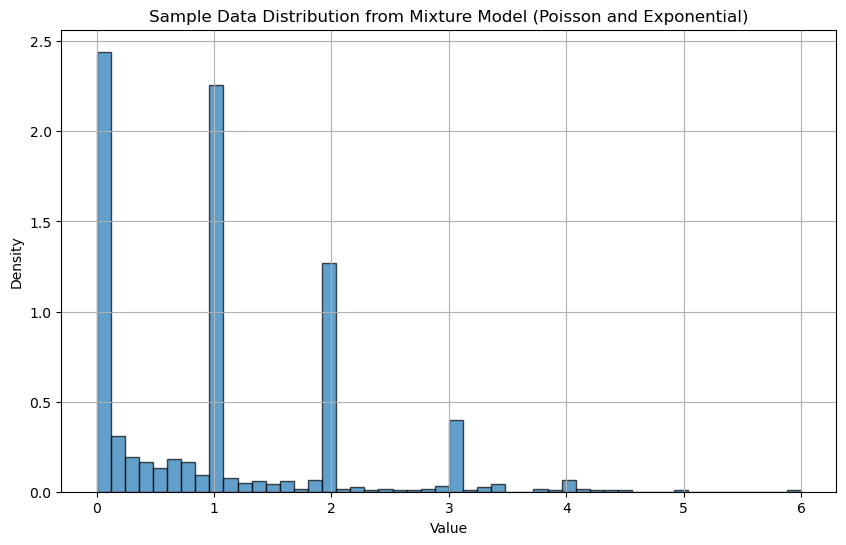

In [9]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Function to generate a single sample of data based on a mixture of Poisson and Exponential distributions
def generate_mixture_data_sample(sample_size, poisson_weight=0.7, poisson_lambda=1, exponential_scale=1):
    group_a = []
    
    for _ in range(sample_size):
        # Group A data generation
        if np.random.rand() < poisson_weight:  # Poisson component
            group_a.append(np.random.poisson(lam=poisson_lambda))
        else:  # Exponential component
            group_a.append(np.random.exponential(scale=exponential_scale))
    
    return np.array(group_a)

# Generate a single sample data set using the mixture model
sample_data = generate_mixture_data_sample(sample_size=1000)

# Plotting the histogram of the generated sample data
plt.figure(figsize=(10, 6))
plt.hist(sample_data, bins=50, alpha=0.7, edgecolor='black', density=True)
plt.title('Sample Data Distribution from Mixture Model (Poisson and Exponential)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)
plt.show()


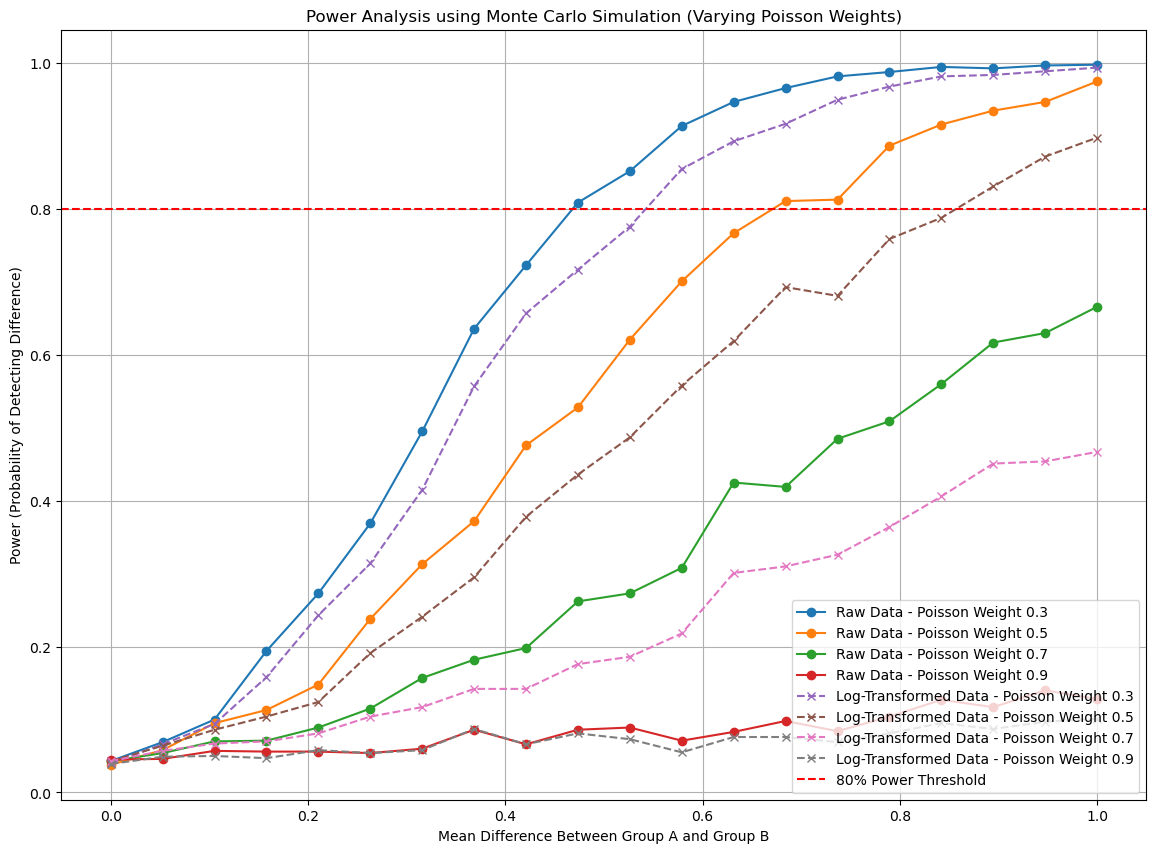

In [10]:
# Function to generate mixture data with varying Poisson weights for the power analysis plot
def monte_carlo_power_analysis_mixture_poisson_weights(mean_shift, poisson_weights, sample_size=200, iterations=1000, alpha=0.05):
    power_results_raw = {}
    power_results_log = {}
    
    for weight in poisson_weights:
        power_raw = []
        power_log = []
        
        for shift in mean_shift:
            significant_count_raw = 0
            significant_count_log = 0
            
            for _ in range(iterations):
                # Generate data for Group A and Group B using the mixture model with the specified Poisson weight
                group_a, group_b = generate_mixture_data(shift, sample_size, poisson_weight=weight)
                
                # Perform the AB test without log transformation
                _, p_value_raw = stats.ttest_ind(group_a, group_b, equal_var=False)
                if p_value_raw < alpha:
                    significant_count_raw += 1

                # Apply log transformation and then perform the AB test
                group_a_log = np.log(group_a + 1)
                group_b_log = np.log(group_b + 1)
                _, p_value_log = stats.ttest_ind(group_a_log, group_b_log, equal_var=False)
                if p_value_log < alpha:
                    significant_count_log += 1
            
            # Calculate the power for each mean shift
            power_raw.append(significant_count_raw / iterations)
            power_log.append(significant_count_log / iterations)
        
        # Store power results for each Poisson weight
        power_results_raw[weight] = power_raw
        power_results_log[weight] = power_log
    
    return power_results_raw, power_results_log

# Define the mean shift range and Poisson weights to analyze
mean_shifts = np.linspace(0, 1, 20)  # Gradually increase mean difference from 0 to 1
poisson_weights = [0.3, 0.5, 0.7, 0.9]  # Different Poisson weights to compare

# Perform the power analysis using Monte Carlo simulation for different Poisson weights
power_results_raw, power_results_log = monte_carlo_power_analysis_mixture_poisson_weights(mean_shifts, poisson_weights)

# Plotting the Power Curves for different Poisson weights with both raw and log-transformed data
plt.figure(figsize=(14, 10))

# Plot for raw data without log transformation
for weight in poisson_weights:
    plt.plot(mean_shifts, power_results_raw[weight], marker='o', label=f'Raw Data - Poisson Weight {weight}')

# Plot for log-transformed data
for weight in poisson_weights:
    plt.plot(mean_shifts, power_results_log[weight], marker='x', linestyle='--', label=f'Log-Transformed Data - Poisson Weight {weight}')

plt.axhline(y=0.8, color='r', linestyle='--', label='80% Power Threshold')
plt.title('Power Analysis using Monte Carlo Simulation (Varying Poisson Weights)')
plt.xlabel('Mean Difference Between Group A and Group B')
plt.ylabel('Power (Probability of Detecting Difference)')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()


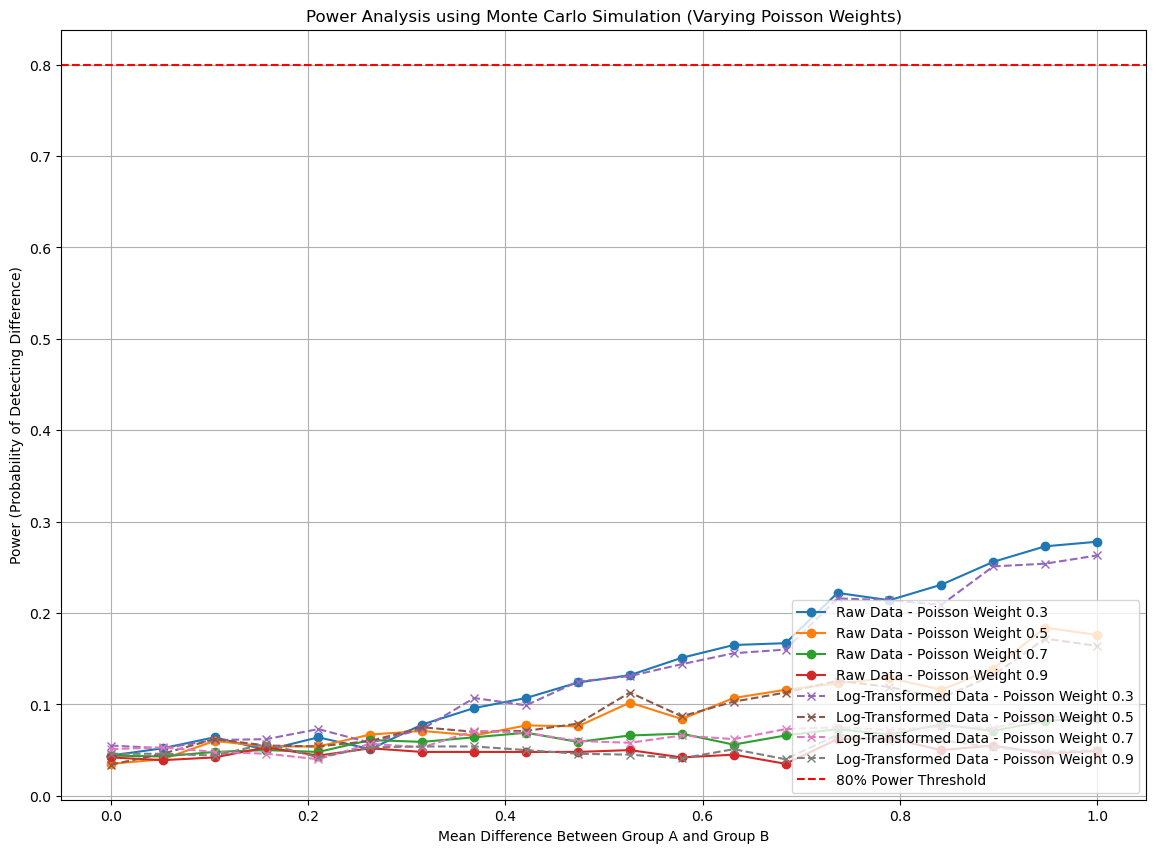

In [11]:

# Define the mean shift range and Poisson weights to analyze
mean_shifts = np.linspace(0, 1, 20)  # Gradually increase mean difference from 0 to 1
poisson_weights = [0.3, 0.5, 0.7, 0.9]  # Different Poisson weights to compare

# Perform the power analysis using Monte Carlo simulation for different Poisson weights
power_results_raw, power_results_log = monte_carlo_power_analysis_mixture_poisson_weights(mean_shifts, poisson_weights, sample_size=20)

# Plotting the Power Curves for different Poisson weights with both raw and log-transformed data
plt.figure(figsize=(14, 10))

# Plot for raw data without log transformation
for weight in poisson_weights:
    plt.plot(mean_shifts, power_results_raw[weight], marker='o', label=f'Raw Data - Poisson Weight {weight}')

# Plot for log-transformed data
for weight in poisson_weights:
    plt.plot(mean_shifts, power_results_log[weight], marker='x', linestyle='--', label=f'Log-Transformed Data - Poisson Weight {weight}')

plt.axhline(y=0.8, color='r', linestyle='--', label='80% Power Threshold')
plt.title('Power Analysis using Monte Carlo Simulation (Varying Poisson Weights)')
plt.xlabel('Mean Difference Between Group A and Group B')
plt.ylabel('Power (Probability of Detecting Difference)')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()